In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_lifestyle_dataset.csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
from collections import defaultdict
import statsmodels.api as sm

# Select predictors and the target variable
predictors = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
              'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
              'Physical_Activity_Hours_Per_Day']
X = df[predictors]
y = df['GPA']

# Add a constant to the predictors for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     587.8
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:50:28   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -706.1
Df Residuals:                    1995   BIC:                            -678.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0232      0.000    154.922      0.000       0.023       0.024
Study_Hours_Per_Day                 0.2371      0.002     96.302      0.000       0.232       0.242
Extracurricular_Hours_Per_Day       0.0752      0.004     19.510      0.000       0.068       0.083
Sleep_Hours_Per_Day                 0.0781      0.002     32.396      0.000       0.073       0.083
Social_Hours_Per_Day                0.0840      0.003     33.187      0.000       0.079       0.089
Physical_Activity_Hours_Per_Day     0.0827      0.002     52.546      0.000       0.080       0.086
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.850
Skew:                           0.028   Prob(JB):                        0.654
Kurtosis:                       3.084   Cond. No.                     1.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### R-squared : 0.541 diperoleh 54,1% variasi dalam dependen.Menunjukkan hubungan yang cukup baik antara prediktor dan target
### Adj.R-squared : 0.540 diperoleh model tidak mengalami overfit
### F-statistic : 587.8 diperoleh dengan p-value < 0.05 menunjukkan bahwa model secara keseluruhan signifikan.



# **Uji Z**

In [ ]:
# Extract coefficients and standard errors from the model
coefficients = model.params
std_errors = model.bse

# Compute z-scores
z_scores = coefficients / std_errors

# Compute p-values for z-scores
from scipy.stats import norm
p_values_z = 2 * (1 - norm.cdf(abs(z_scores)))

# Combine the results in a DataFrame
z_test_results = pd.DataFrame({
    'Coefficient': coefficients,
    'Std Error': std_errors,
    'Z-Score': z_scores,
    'P-Value (Z-Test)': p_values_z
})

# Display the z-test results
print(z_test_results)


                                 Coefficient  Std Error     Z-Score  \
const                               0.023209   0.000150  154.922036   
Study_Hours_Per_Day                 0.237055   0.002462   96.301532   
Extracurricular_Hours_Per_Day       0.075174   0.003853   19.509581   
Sleep_Hours_Per_Day                 0.078122   0.002411   32.395910   
Social_Hours_Per_Day                0.083983   0.002531   33.186530   
Physical_Activity_Hours_Per_Day     0.082671   0.001573   52.545785   

                                 P-Value (Z-Test)  
const                                         0.0  
Study_Hours_Per_Day                           0.0  
Extracurricular_Hours_Per_Day                 0.0  
Sleep_Hours_Per_Day                           0.0  
Social_Hours_Per_Day                          0.0  
Physical_Activity_Hours_Per_Day               0.0  


# **Uji T**

In [ ]:
# Extract coefficients and standard errors from the model
coefficients = model.params
std_errors = model.bse

# Compute t-scores
t_scores = coefficients / std_errors

# Compute p-values for t-scores
from scipy.stats import t
degrees_of_freedom = model.df_resid  # Residual degrees of freedom
p_values_t = 2 * (1 - t.cdf(abs(t_scores), df=degrees_of_freedom))

# Combine the results in a DataFrame
t_test_results = pd.DataFrame({
    'Coefficient': coefficients,
    'Std Error': std_errors,
    'T-Score': t_scores,
    'P-Value (T-Test)': p_values_t
})

# Display the t-test results
print(t_test_results)


                                 Coefficient  Std Error     T-Score  \
const                               0.023209   0.000150  154.922036   
Study_Hours_Per_Day                 0.237055   0.002462   96.301532   
Extracurricular_Hours_Per_Day       0.075174   0.003853   19.509581   
Sleep_Hours_Per_Day                 0.078122   0.002411   32.395910   
Social_Hours_Per_Day                0.083983   0.002531   33.186530   
Physical_Activity_Hours_Per_Day     0.082671   0.001573   52.545785   

                                 P-Value (T-Test)  
const                                         0.0  
Study_Hours_Per_Day                           0.0  
Extracurricular_Hours_Per_Day                 0.0  
Sleep_Hours_Per_Day                           0.0  
Social_Hours_Per_Day                          0.0  
Physical_Activity_Hours_Per_Day               0.0  


### > Diperoleh P- value 0.0 maka semua varibel sangat signifikan
### > Diperoleh T-score rasio Standart erorr memiliki nilai lebih besar emnunjukkan efek signifikan T-score Study_Hours_Per_Day adalah 96.30 maka pengaruh sangat signifikan

# **R-Square line**

In [ ]:
import numpy as np
from scipy.stats import norm

# Data sampel
sample_mean = 3.0       # Rata-rata sampel
population_mean = 3.2   # Rata-rata populasi yang dihipotesiskan
sample_std = 0.5        # Standar deviasi sampel
sample_size = 100       # Ukuran sampel

# Menghitung z-statistik
z_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Menghitung p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Output hasil
print(f"Z-Statistik: {z_stat}")
print(f"P-Value: {p_value}")

# Kesimpulan
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print("Tolak H0: Mean sampel berbeda secara signifikan dari mean populasi.")
else:
    print("Gagal menolak H0: Tidak ada bukti bahwa mean sampel berbeda dari mean populasi.")



Z-Statistik: -4.0000000000000036
P-Value: 6.334248366623996e-05
Tolak H0: Mean sampel berbeda secara signifikan dari mean populasi.


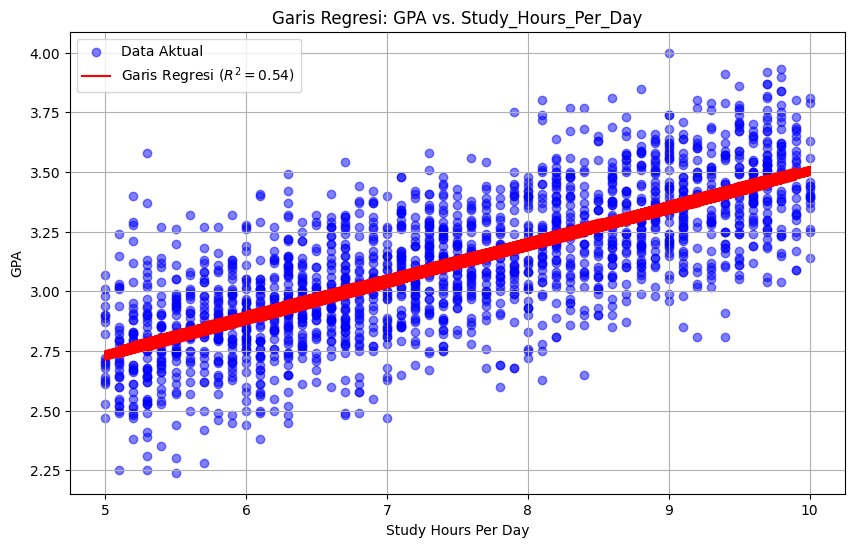

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menggunakan salah satu prediktor, misalnya 'Study_Hours_Per_Day'
x = df['Study_Hours_Per_Day']
y_actual = df['GPA']

# Prediksi nilai GPA menggunakan model
y_predicted = model.predict(X)

# Plot data aktual dan garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(x, y_actual, color='blue', alpha=0.5, label='Data Aktual')
plt.plot(x, y_predicted, color='red', label=f'Garis Regresi ($R^2 = {model.rsquared:.2f}$)')
plt.title('Garis Regresi: GPA vs. Study_Hours_Per_Day')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()


### > Jika garis merah terlihat pas dengan data scatter, ini menunjukkan model regresi cukup baik dalam memprediksi GPA berdasarkan jumlah jam belajar. Sebaliknya, jika garis terlihat jauh dari sebagian besar titik, maka model memiliki kesalahan prediksi yang tinggi.
### > Jika data menunjukkan pola bahwa semakin tinggi Study_Hours_Per_Day, maka GPA juga meningkat, ini menandakan hubungan positif.Namun, jika titik-titik data tersebar luas di sekitar garis atau tidak ada pola yang jelas, maka hubungan antara jam belajar dan GPA mungkin lemah.